<a href="https://colab.research.google.com/github/Shukria21/My-Projects/blob/main/Shukria_Gulzar_Midterm_Homework_Multiple_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shukria Gulzar

Machine Learning

03/24/24

***Description:***

In this project, I want to predict which country will emerge as the winner of the 2022 FIFA World Cup. I obtained a dataset from Kaggle containing information spanning from 1993 to 2022, detailing the winning country for each year, along with the number of goals they scored and the number of matches they played. Additionally, the dataset includes data on the runners-up (2nd place), teams finishing in 3rd and 4th place, as well as details about the host team and whether matches were played at home or away.

--------------------------------------------------------------------------------

In this project, the three classifiers I used are:

- *Logistic Regression*
- *Support Vector Machine (SVM)*
- *k-Nearest Neighbors (KNN)*

For calculating the ROC curve I had to use OvR strategy.

-------------------------------------------------------------------------------

***resources:***

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.preprocessing.LabelEncoder.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=The%20One%2Dvs%2Dthe%2D,negative%20class%20as%20a%20bulk.


Homework2: https://colab.research.google.com/drive/1VDfOIWrkTgpOURg6fEx57XRy2zOWbK0n?usp=sharing

code demos:

  - https://colab.research.google.com/drive/1xpg-IA0jCxXDHSdx2jXL8ps2v9gNgkLc?usp=sharing

  - https://colab.research.google.com/drive/1x5GfNLHRbL7zswscRFQ41xRHkinLtmY9?usp=sharing


- CHATGPT (https://chat.openai.com/)


***CSV link:***
https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge?select=world_cups.csv






In [ ]:
!mkdir mywork
!mkdir mydata
!cp -r /content/drive/MyDrive/CS3210

cp: missing destination file operand after '/content/drive/MyDrive/CS3210'
Try 'cp --help' for more information.


First I importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#**First Module Logistic Regression**


In below code I perform the Logistic Regression. I used homework 2 as a reference but it turn out so much different than homework 2 because in the dataset there was non-numerical cloumns so it needed extra steps for that. I was getting a lot of error with performing arithmetic operations on string values. Since there was columns non-numeric which it cant directly use the arithmetic operations. Computing the ROC curve was so challenging and I run into a lot of error as the most common error was: " multiclass format is not supported" or "numpy.float64' object is not callable."

After researching, I found out that OVR strategy is useful while doing the ROC curve.

-------------------------------------------------------------------------------

***In the code below: ***

- First I used pandas to read the dataset

- Used the Label Encoder for encoding the target variable

- checking if there is any missing vlaues

- Used One-hot encode to represent categorical variables numerically

- Splits the dataset into training and testing sets

-  illustrate logistic regression model to predict

- Compute ROC curve and ROC AUC score for each class (OvR strategy)

- then calculte and print the confusion matrix, precision, recall, F1 score, and ROC AUC score




<ipython-input-4-f83d99510bf6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


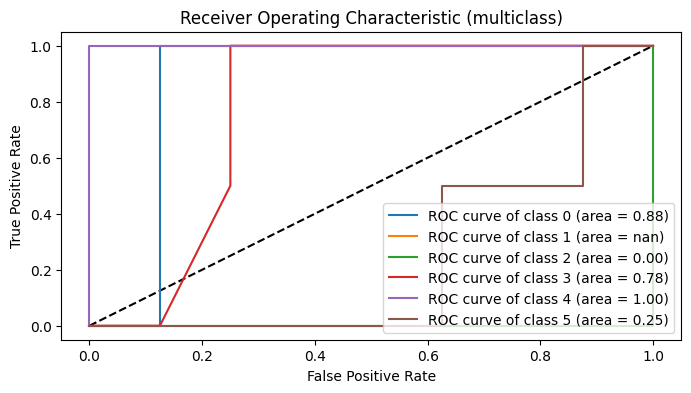

Confusion Matrix:
 [[0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.7413194444444443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Use pandas to read CSV file
col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)

# Select features
feature_cols = ['Year', 'Goals Scored', 'Qualified Teams', 'Matches Played', 'Host Country']
X = WC[feature_cols]
Y = WC['Winner']  # Target variable

# Using Label encoder
le = LabelEncoder()
Y = le.fit_transform(Y) # encoding the target variable

# Handle missing values
for column in feature_cols:
    if X[column].isna().any(): #isna() to check if the Dataframe  contain missing value
        X[column].fillna(X[column].mode()[0], inplace=True)

# One-hot encode for representing categorical variables numerically
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.4, random_state=0)

# illustrate logistic regression model
logreg = LogisticRegression()

# Fit the model with training data
logreg.fit(X_train, y_train)

# Predict using the logistic regression model
y_pred_proba = logreg.predict_proba(X_test)

# Compute ROC curve and ROC AUC score for each class (OvR strategy)
fpr = dict()
tpr = dict()
roc_auc = dict()

# this for loop for looping over each classes using lorgreg.classes
for i in range(len(logreg.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC AUC score
#note average= macro to calculate the macro average
roc_auc_macro = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, average='macro')

# Plot ROC curve for each class
plt.figure(figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--') # diagonal dashed line

#plots the ROC curve for each class
for i in range(len(logreg.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'.format(i, roc_auc[i]))
plt.xlabel('False Positive Rate') #x
plt.ylabel('True Positive Rate') #y
plt.title('Receiver Operating Characteristic (multiclass)')
plt.legend(loc="lower right")
plt.show()

# Calculate and print the confusion matrix, precision, recall, F1 score, and ROC AUC score
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, average='macro')

print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


As it shows I got 0.0 for Precision, recall, and F1 score. I decided to try it without roc curve to see if there will be any changes. As the output shown I got different results for those scores. Since its not binary classification I think the accuracy of .2 doesn't seems so bad.

In [ ]:
# Use pandas to read CSV file
col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)

# Select features
feature_cols = ['Year', 'Host Country', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
X = WC[feature_cols]
y = WC['Winner']  # Target variable

# Using Label encoder for both X and y
le_X = LabelEncoder()
le_y = LabelEncoder()

# Convert categorical features to numerical values
X_encoded = X.apply(le_X.fit_transform)
y_encoded = le_y.fit_transform(y)

# Convert 'Year' column to numeric
X_encoded['Year'] = pd.to_numeric(X_encoded['Year'], errors='coerce')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=0)

# illustrate logistic regression model
logreg = LogisticRegression(max_iter=100000)

# Fit the model with training data
logreg.fit(X_train, y_train)

# Predict using the logistic regression model
y_pred_proba = logreg.predict_proba(X_test)

# Calculate and print the confusion matrix, precision, recall, F1 score
y_pred = logreg.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

#print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.21428571428571427
Recall: 0.2857142857142857
F1 Score: 0.23809523809523808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Second Module SVM**

Now I used svm classifer. In this code eveyrthing is the same as above code.

***In the code below:***

- First I used pandas to read the dataset

- Used the Label Encoder for encoding the target variable

- checking if there is any missing vlaues

- Used One-hot encode to represent categorical variables numerically

- Splits the dataset into training and testing sets

- illustrate svm model to predict

- Compute ROC curve and ROC AUC score for each class (OvR strategy)

- then calculte and print the confusion matrix, precision, recall, F1 score, and ROC AUC score



<ipython-input-6-07e0515dc108>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


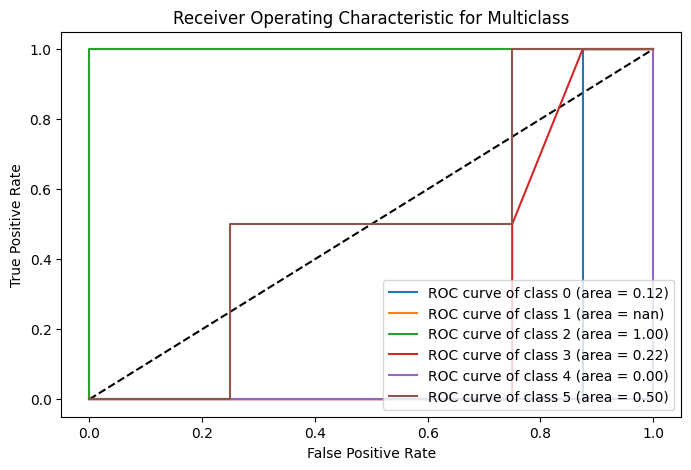

Confusion Matrix:
 [[0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Use pandas to read CSV file
col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)

# Select features
feature_cols = ['Year', 'Goals Scored', 'Qualified Teams', 'Matches Played', 'Host Country']
X = WC[feature_cols]
Y = WC['Winner']  # Target variable

# Using Label encode the target variable
le = LabelEncoder()
Y = le.fit_transform(Y)

# Handle missing values
for column in feature_cols:
    if X[column].isna().any():
        X[column].fillna(X[column].mode()[0], inplace=True)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.4, random_state=0)

# Instantiate SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', probability=True)

# Fit the model
svm_classifier.fit(X_train, y_train)

# Predict
y_pred = svm_classifier.predict(X_test)

# Predict probabilities
y_pred_proba = svm_classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC score for each class (OvR strategy)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(svm_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC AUC score
roc_auc_macro = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, average='macro')

# Plot ROC curve for each class
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(svm_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'.format(i, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Calculate and print the confusion matrix, precision, recall, F1 score, and ROC AUC score
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Similar to Logistic Regression, I got 0.0 for Precision, Recall, and F1 score.



In [ ]:
# # Use pandas to read CSV file
# col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
# WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)
#
# # Select features
# feature_cols = ['Year', 'Goals Scored', 'Qualified Teams', 'Matches Played']
# X = WC[feature_cols]
# Y = WC['Winner']  # Target variable
#
# # Using Label encode the target variable
# le = LabelEncoder()
# Y = le.fit_transform(Y)
#
# # Handle missing values
# for column in feature_cols:
#     if X[column].isna().any():
#         X[column].fillna(X[column].mode()[0], inplace=True)
#
# # One-hot encode categorical features
# X_encoded = pd.get_dummies(X, drop_first=True)
#
# # Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.4, random_state=0)
#

# Instantiate SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', probability=True)

# Fit the model with training data
svm_classifier.fit(X_train, y_train)

# Predict using the SVM classifier
y_pred = svm_classifier.predict(X_test)

# Predict probabilities using the SVM classifier
y_pred_proba = svm_classifier.predict_proba(X_test)



# Calculate and print the confusion matrix, precision, recall, F1 score, and ROC AUC score
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#SVM rbf
svm_classifier_rbf = SVC(kernel='rbf', probability=True)

# Fit the model with training data
svm_classifier_rbf.fit(X_train, y_train)

# Predict using the SVM classifier
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Predict probabilities using the SVM classifier
y_pred_proba_rbf = svm_classifier_rbf.predict_proba(X_test)


# Calculate and print the confusion matrix, precision, recall, F1 score, and ROC AUC score
cnf_matrix = confusion_matrix(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf, average='macro')
recall = recall_score(y_test, y_pred_rbf, average='macro')
f1 = f1_score(y_test, y_pred_rbf, average='macro')


Confusion Matrix:
 [[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]
Precision: 0.08333333333333333
Recall: 0.08333333333333333
F1 Score: 0.08333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As shown using the svm_rbf I got 0.83 for Precision, Recall, and F1 score.

#**Third Module  KNN**

In below code I used the KNN classifer and everything is the same as my previous code only I instantiate knn classifier.

<ipython-input-8-8332907ef9d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = labelEncoder.fit_transform(X[col])
<ipython-input-8-8332907ef9d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = labelEncoder.fit_transform(X[col])
<ipython-input-8-8332907ef9d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

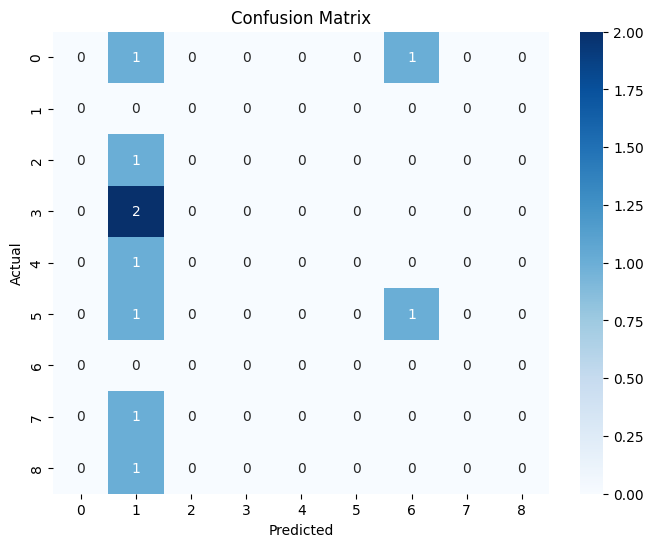

Confusion Matrix:
 [[0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [ ]:
#Use pandas to read CSV file as dataframe
col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)

#Select at least 4 or 5 most important features from the chosen dataset and list the reason of why these features are selected
feature_cols = ['Year', 'Goals Scored', 'Qualified Teams', 'Matches Played', 'Host Country']
X=WC[feature_cols]
Y= WC['Winner']# Target variable

# Use label encoder for categorical features
labelEncoder = LabelEncoder()
for col in feature_cols:
    X[col] = labelEncoder.fit_transform(X[col])

# Use label encoder for the target variable
Y = labelEncoder.fit_transform(Y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_pred = knn.predict(X_test)

# Compute evaluation metrics
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

As shown,I still got 0.0 for Precision, Recall and F1 socre.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN 1 neighbor


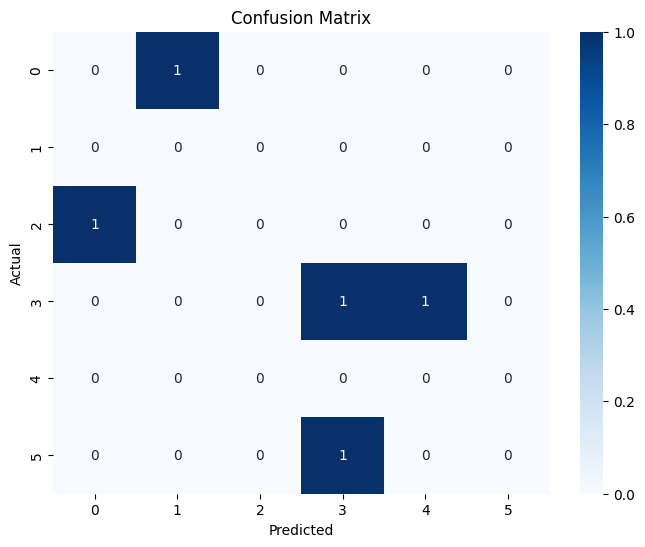

KNN 1 neighbor
Confusion Matrix:
 [[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]
Precision: 0.2
Recall: 0.2
F1 Score: 0.2
KNN 1 neighbor


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


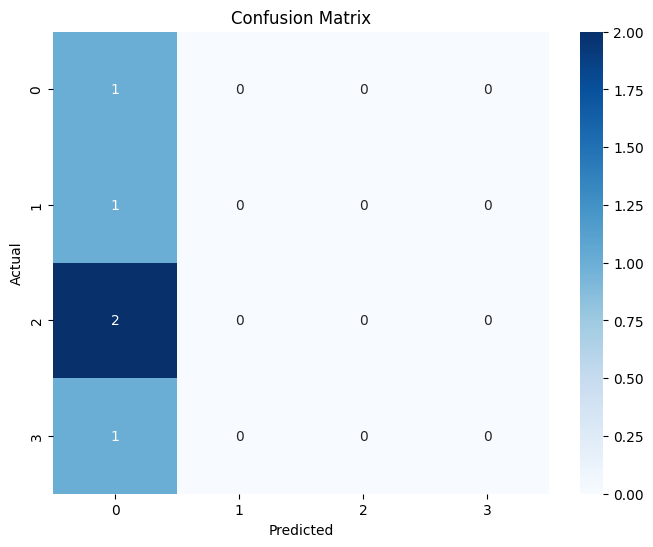

KNN 3 neighbor
Confusion Matrix:
 [[1 0 0 0]
 [1 0 0 0]
 [2 0 0 0]
 [1 0 0 0]]
Precision: 0.04
Recall: 0.2
F1 Score: 0.06666666666666668


In [ ]:
#Use pandas to read CSV file as dataframe
# col_names = ['Year', 'Host Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals Scored', 'Qualified Teams', 'Matches Played']
# WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv", header=None, names=col_names)
#
# #Select at least 4 or 5 most important features from the chosen dataset and list the reason of why these features are selected
# feature_cols = ['Year','Goals Scored', 'Qualified Teams', 'Matches Played']
# X=WC[feature_cols]
# Y= WC['Winner']# Target variable
#
# # Use label encoder for categorical features
# labelEncoder = LabelEncoder()
# for col in feature_cols:
#     X[col] = labelEncoder.fit_transform(X[col])
#
# # Use label encoder for the target variable
# Y = labelEncoder.fit_transform(Y)
#
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_pred = knn.predict(X_test)

# Compute evaluation metrics
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot confusion matrix
print("KNN 1 neighbor")
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("KNN 1 neighbor")
print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### KNN 3
# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_pred = knn.predict(X_test)

# Compute evaluation metrics
cnf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot confusion matrix
print("KNN 1 neighbor")
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("KNN 3 neighbor")
print("Confusion Matrix:\n", cnf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

I tried KNN 1 neighbor and it shows that it did better than KNN 3 neighbor.

In code below I tried to see the accuracy of each classifier.I tried to evaluates their performance using accuracy.

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)


# SVM
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)






Logistic Regression Accuracy: 0.2
SVM Accuracy: 0.2
KNN Accuracy: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



#**Questions:**


7. 	Which is the best classifier and why?

I think the best classifer is the Logistic Regression because it had an accuracy of 0.2. Somehow when I calculate the f1, Recall, and Precision it was 0.0, but then when I calculate without roc curve, it seems that the Precision, Recall, and F1 score is 0.2 as well.
When I decided to change the code a bit, as you can see svm_rbf did worse than svm_linear. svm_linear did the same as logreg. knn with 1 neighbor did better than knn with 3 neighbors. So thats why I think Logistic regression is the best.**bold text**  


8. What affect the classification performance?

I think it depends on what dataset has been selected. Each dataset is different the one I choose had cloumns that were non-numerical and it caused a lot of errors for me. I think the dataset itself plays a critical role in determining the success of classification models.Also, the relationship between the features, because what I understand is that if the relationship between feature is non-linear, SVM or KNN may perform better but if its linear then Logistic regression.









# predicting the winner
For guessing which country is the winner of World cup, I tried all three classifer and for svm and Logistic regression the prediction was the same while for the knn it was different.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Read the dataset
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv")
print(WC.head())

# Filter data for years before 2022
data = WC[WC['Year'] < 2022]

# Define features and target
X = data.drop('Winner', axis=1)  # Features
y = data['Winner']  # Target

# Perform one-hot encoding on features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Define features
features = {
    'Year': [2022],
    'Host Country': ['Qatar'],
}

# Create a DataFrame
df = pd.DataFrame(features)

# Perform one-hot encoding on upcoming features

encode = pd.get_dummies(df)

# Reorder the columns to match the order of columns used during training
encode = encode.reindex(columns=X_encoded.columns, fill_value=0)

# Use the model to predict the winner
predicted_winner = model.predict(encode)

print("Predicted winner for the 2022 World Cup (using Logistic Regression classifier) is:", predicted_winner[0])








   Year Host Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   Goals Scored  Qualified Teams  Matches Played  
0          70.0               13              18  
1          70.0               16              17  
2          84.0               15              18  
3          88.0               13              22  
4         140.0               16              26  
Predicted winner for the 2022 World Cup (using Logistic Regression classifier) is: England


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***Second Module***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the dataset
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv")
print(WC.head())

# Filter data for years before 2022
data = WC[WC['Year'] < 2022]

# Define features and target
X = data.drop('Winner', axis=1)  # Features
y = data['Winner']  # Target

# Perform one-hot encoding on features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Define features
features = {
    'Year': [2022],
    'Host Country': ['Qatar'],

}

# Create a DataFrame
df = pd.DataFrame(features)

# Perform one-hot encoding on upcoming features
encode = pd.get_dummies(df)

# Reorder the columns to match the order of columns used during training
encode = encode.reindex(columns=X_encoded.columns, fill_value=0)

# Use the model to predict the winner
predicted_winner = model.predict(encode)

print("Predicted winner for the 2022 World Cup (using KNN classifier) is:", predicted_winner[0])


   Year Host Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   Goals Scored  Qualified Teams  Matches Played  
0          70.0               13              18  
1          70.0               16              17  
2          84.0               15              18  
3          88.0               13              22  
4         140.0               16              26  
Predicted winner for the 2022 World Cup (using KNN classifier) is: England


****Third Module****

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import Support Vector Classifier

# Read the dataset
WC = pd.read_csv("/content/drive/MyDrive/CS3210/world_cups.csv")
print(WC.head())

# Filter data for years before 2022
data = WC[WC['Year'] < 2022]

# Define features and target
X = data.drop('Winner', axis=1)  # Features
y = data['Winner']  # Target

# Perform one-hot encoding on features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Define features
features = {
    'Year': [2022],
    'Host Country': ['Qatar'],
}

# Create a DataFrame
df = pd.DataFrame(features)

# Perform one-hot
encode = pd.get_dummies(df)

# Reorder the columns to match the order of columns used during training
encode = encode.reindex(columns=X_encoded.columns, fill_value=0)

# Use the model to predict the winner
predicted_winner = model.predict(encode)

print("Predicted winner for the 2022 World Cup (using SVM classifier) is:", predicted_winner[0])


   Year Host Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   Goals Scored  Qualified Teams  Matches Played  
0          70.0               13              18  
1          70.0               16              17  
2          84.0               15              18  
3          88.0               13              22  
4         140.0               16              26  
Predicted winner for the 2022 World Cup (using SVM classifier) is: England
